# Малахов В.В. ИУ5Ц-83Б | РК2 - вариант №27 

Линейная/логистическая регрессия  
Случайный лес  
Датасет 27 - https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head(3)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# NaN значений нет
df.isna().sum().max()

0

In [7]:
# Дубликатов нет
df.duplicated().sum()

0

In [8]:
# Классы сильно перекошены
print(df['Bankrupt?'].value_counts())
print('-'* 30)
print('Финансово стабильный: ', round(df['Bankrupt?'].value_counts()[0]/len(df) * 100,2), '%')
print('Финансово нестабильный: ', round(df['Bankrupt?'].value_counts()[1]/len(df) * 100,2), '%')

Bankrupt?
0    6599
1     220
Name: count, dtype: int64
------------------------------
Финансово стабильный:  96.77 %
Финансово нестабильный:  3.23 %


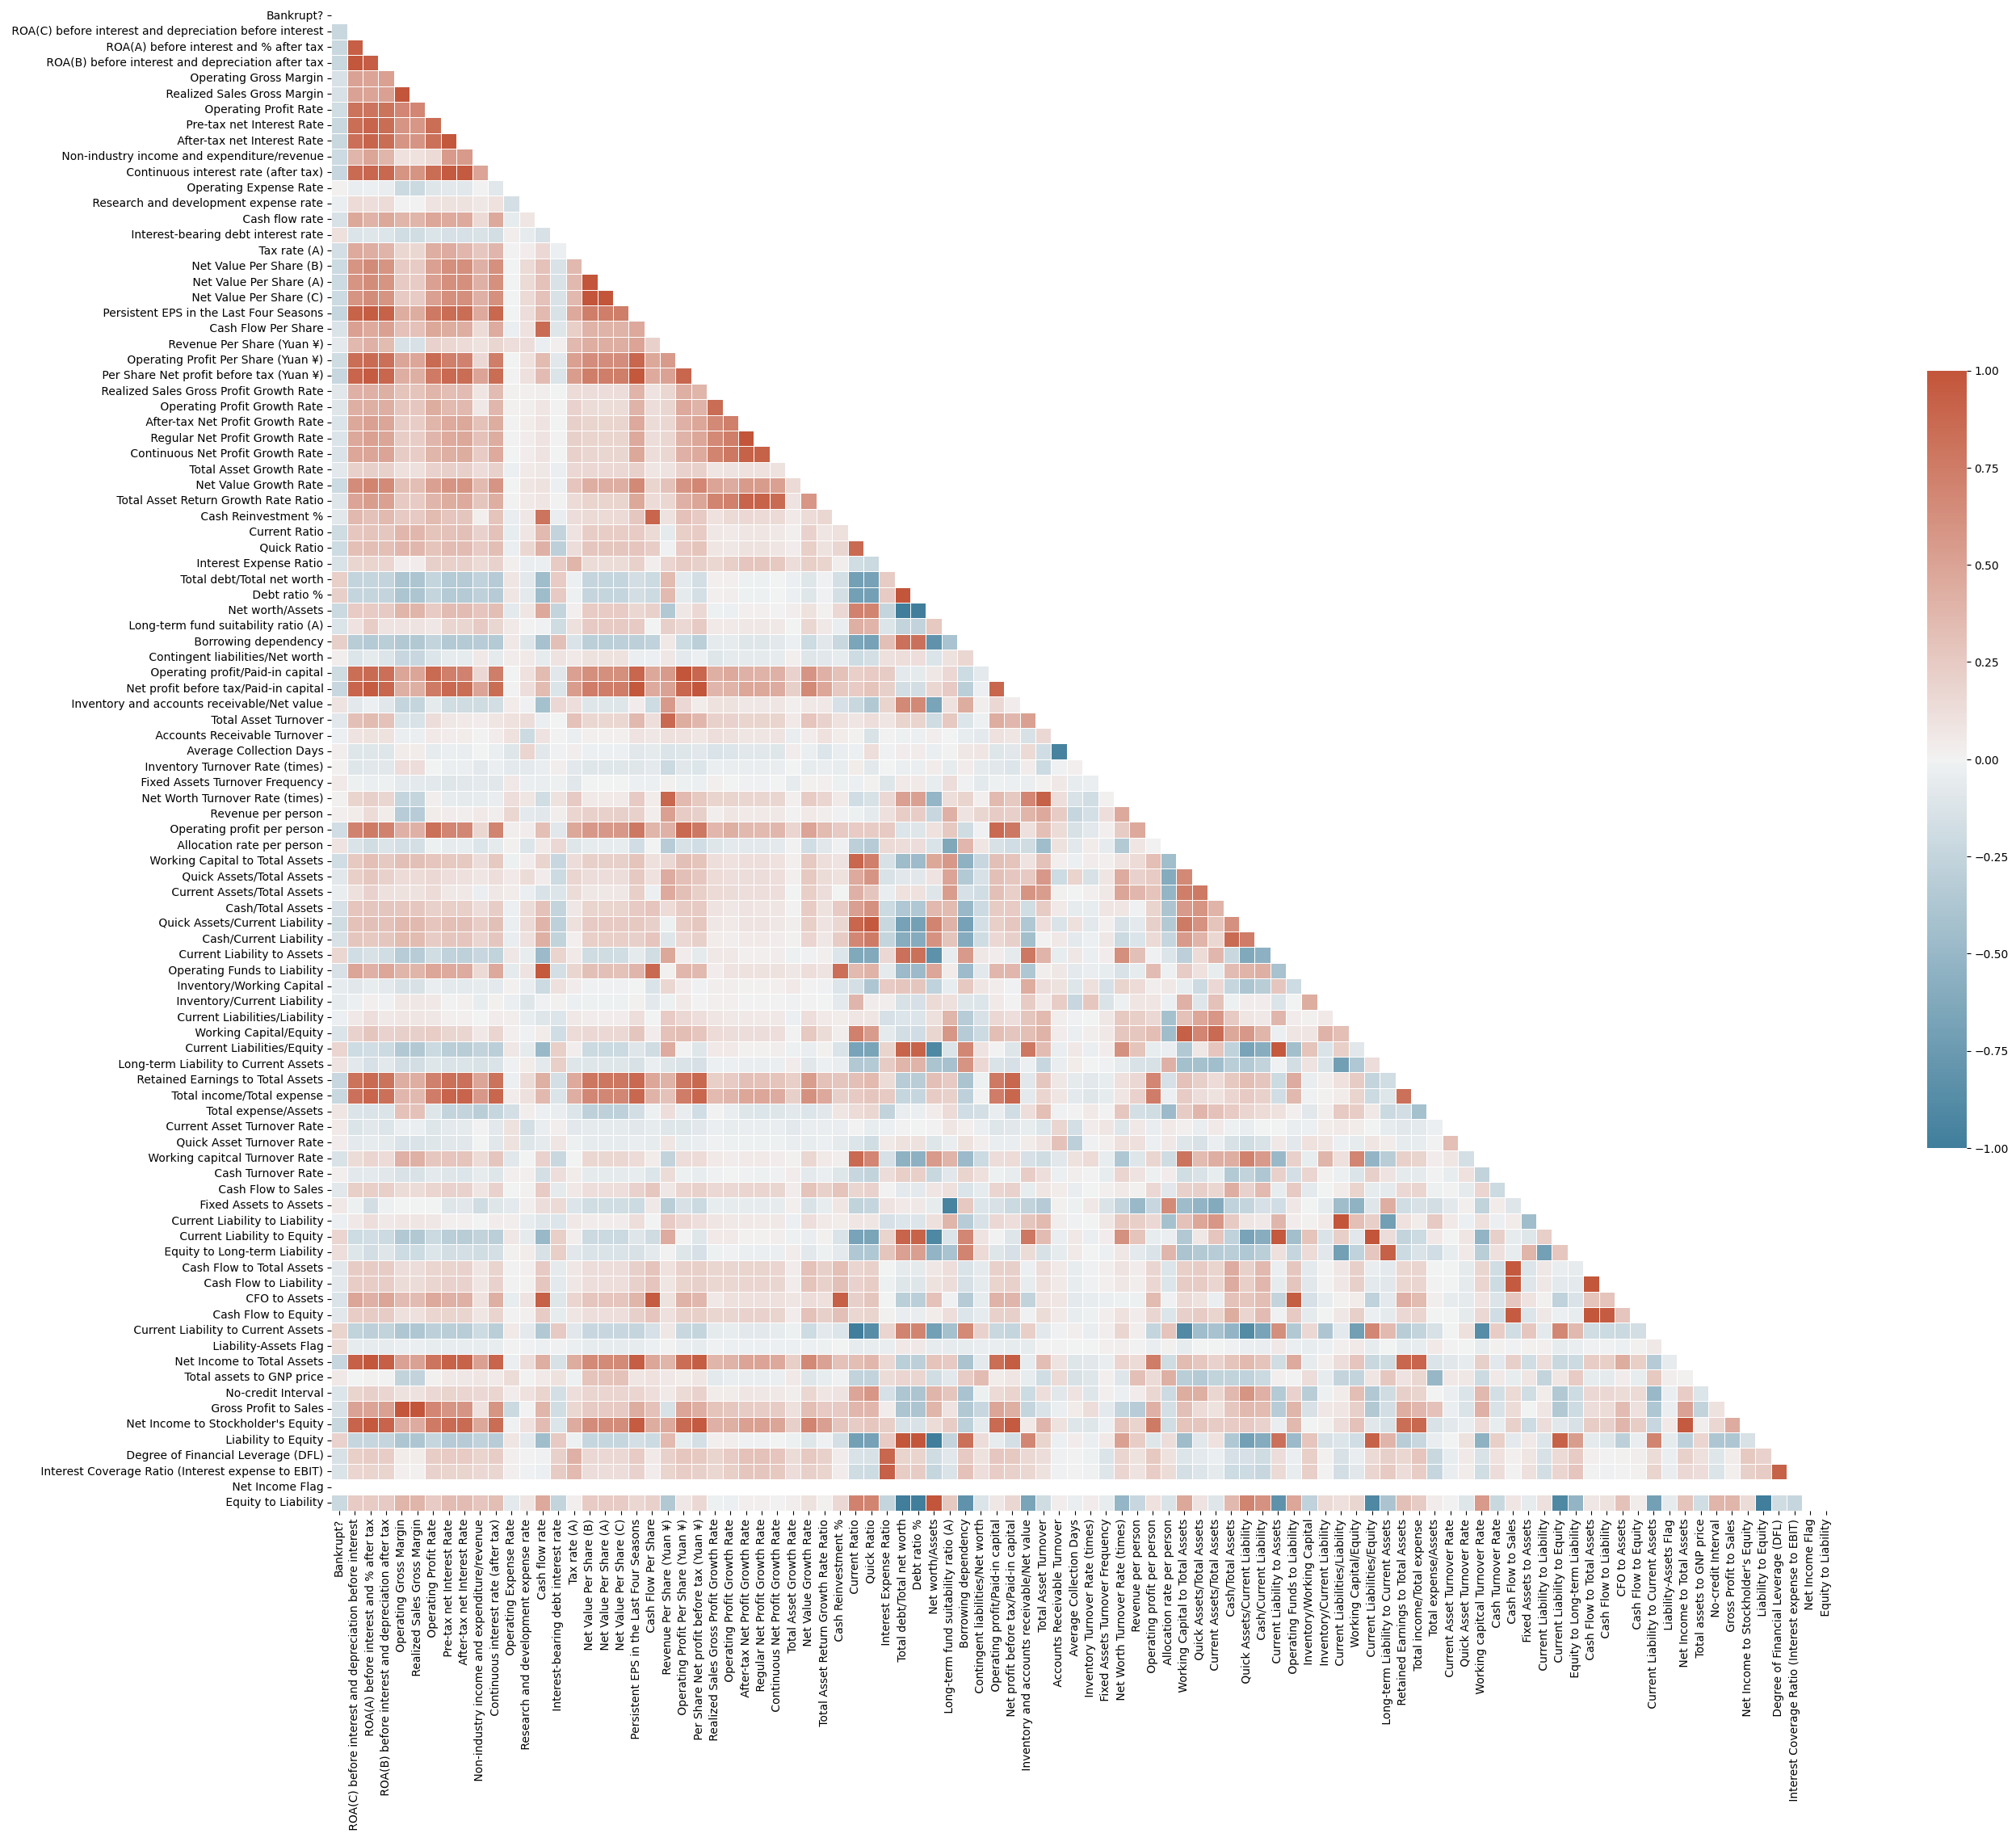

In [9]:
# Матица корреляции по методу Спирмана

f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X:", X.shape)
print("y:", y.shape)

X: (6819, 95)
y: (6819,)


In [11]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (5455, 95)
y_train: (5455,)
X_test: (1364, 95)
y_test: (1364,)


In [12]:
# Случайные леса
clf = RandomForestClassifier()

In [13]:
df_bankrupt_0 = df[df['Bankrupt?'] == 0]
df_bankrupt_1 = df[df['Bankrupt?'] == 1]

df_bankrupt_0_sample = df_bankrupt_0.sample(n=250, replace=True)
df_bankrupt_1_sample = df_bankrupt_1.sample(n=250, replace=True)

df_resized = pd.concat([df_bankrupt_0_sample, df_bankrupt_1_sample])

In [14]:
df_resized.head(3)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
48,0,0.493346,0.550534,0.539804,0.610206,0.610206,0.999023,0.797429,0.809341,0.303480,...,0.799842,0.018859,0.623536,0.610202,0.840599,0.288724,0.028759,0.568437,1,0.017125
5278,0,0.581144,0.590166,0.611114,0.628944,0.628944,0.999259,0.797704,0.809530,0.303469,...,0.831194,0.080346,0.623715,0.628939,0.841937,0.275821,0.026792,0.565161,1,0.095179
1855,0,0.506021,0.595235,0.579528,0.633210,0.633210,0.999174,0.797574,0.809564,0.303418,...,0.827724,0.002030,0.624111,0.633208,0.841680,0.275506,0.026791,0.565158,1,0.127641


In [15]:
params= {
    
    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)
    
}

model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)

X = df_resized.drop(columns=['Bankrupt?']) 
y = df_resized['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
model.fit(X_train , y_train)
model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'max_depth': 40, 'n_estimators': 50}

In [17]:
y_pred = model.predict(X_test)

# Метрика Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Метрика Precision
precision = precision_score(y_test, y_pred)

# Метрика Recall
recall = recall_score(y_test, y_pred)

# Метрика F1-score
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96
Precision: 0.9473684210526315
Recall: 0.9818181818181818
F1-score: 0.9642857142857142


In [18]:
clf = RandomForestClassifier(max_depth=50, n_estimators=75)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.96
Precision: 0.9473684210526315
Recall: 0.9818181818181818
F1-score: 0.9642857142857142


In [19]:
df_bankrupt_0 = df[df['Bankrupt?'] == 0]
df_bankrupt_1 = df[df['Bankrupt?'] == 1]

df_bankrupt_0_sample = df_bankrupt_0.sample(n=250, replace=True)
df_bankrupt_1_sample = df_bankrupt_1.sample(n=250, replace=True)

df_resized = pd.concat([df_bankrupt_0_sample, df_bankrupt_1_sample])

X = df_resized.drop(columns=['Bankrupt?']) 
y = df_resized['Bankrupt?']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

log_reg = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'class_weight': ['balanced', None]}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

best_log_reg = grid_search.best_estimator_

y_pred = best_log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.64
Precision: 0.6666666666666666
Recall: 0.5306122448979592
F1-score: 0.5909090909090909


Вывод: как мы видим, случайные леса при +- равных выборках имеют лучшие показатели метрик, чем логистическая регрессия. Если увеличить размер выборки, то несбалансированность классов также увеличится, что негативно скажется на метриках моделей.  
  
Случайные леса:  
Accuracy: 0.96  
Precision: 0.9473684210526315  
Recall: 0.9818181818181818  
F1-score: 0.9642857142857142  

Логистическая регрессия:  
Accuracy: 0.64  
Precision: 0.6666666666666666  
Recall: 0.5306122448979592  
F1-score: 0.5909090909090909  